# Guia Laboratorio Filtros Digitales 
## Procesamiento Digital de Señales
### Briandy Paola Talaigua Florez 1007523573

In [1]:
import numpy as np
from matplotlib.pylab import *
#from scipy import *
import scipy.signal as signal
#from ztrans import *
%matplotlib inline

## 1. Diseño de Filtro FIR por Metodo Enventanado

#### 1.1 Se desea diseñar un filtro FIR rechaza-banda por el Método de envetando, teniendo en cuenta las siguientes consideraciones 
* Frecuencia de muestreo: 12kHz
* Frecuencia de corte 1: 5kHz
* Frecuencia de corte 2: 8kHz
* Ripple: 0.4%
* Ancho de banda de la transición 300 Hz


In [75]:
def choose_windows(name='Hamming', N=20): #funcion que nos ayuda a elegir la ventana
    # Rect/Hanning/Hamming
    if name == 'Hamming':
        window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Hanning':
        window = np.array([0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) for n in range(N)])
    elif name == 'Rect':
        window = np.ones(N)
    elif name == 'black':
        window = np.array([0.42-0.5*np.cos((2*np.pi*n)/(N-1))+0.08*np.cos((4*np.pi*n)/(N-1))for n in range(N)])
    return window
def ventana(Ripple):
    ventana = 20*np.log10(Ripple) 
    v=np.abs(ventana)
    if v <= 21:
        print (ventana," la ventana ideal es Rectangular")
        
    elif 22 < v <= 44:
         print (ventana," la ventana ideal es Hanning")
            
    elif 45 < v <= 53:
         print (ventana," la ventana ideal es Hamming")
            
    elif v>= 74:
         print (ventana," la ventana ideal es Blackman")
        


#### 1.2 Diga cual es la ventan ideal y el orden del Filtro

In [78]:
fc1=5000.0
fc2=8000.0
fs=12000.0 # frec de muestreo
Adb=0 # Ganancia del filtro en decibeles
N = 512 # Numero de puntos de la FFT
BW=300 # Ancho de banda en la banda de transicion

# Normalizar las frecuencias de corte en radianes: 
wc1 = (2*np.pi*fc1)/(fs)
wc2 = (2*np.pi*fc2)/(fs)
# eleccion de ventana 
bwn = (2*pi*BW)/(fs)
M=int(4/bwn) # orden estimado del filtro
print('Orden del filtro: ', M)
# tipo de ventana
ventana(0.004)

n = np.arange(-M,M)

h1 = wc1/np.pi * np.sinc(wc1*n/np.pi) - wc2/np.pi * np.sinc(wc2*n/np.pi)
#Truncar la RTA en el origen --> Rechazabanda
h1[n==0] = 1 - (wc2-wc1)/np.pi

w1,Hh1 = signal.freqz(h1,1,whole=True, worN=N) # Respuesta en frecuencia del filtro ideal

win= signal.hamming(len(n)) # funcion ventana para eliminar el fenomeno de Gibbs

h2=h1*win # Multiplico la respuesta ideal por la ventana

A=np.sqrt(10**(0.1*Adb))
h2=h2*A # Ganancia del filtro
w2,Hh2 = signal.freqz(h2,1,whole=True, worN=N) # Respuesta en frecuencia del filtro enventanado


Orden del filtro:  25
-47.95880017344075  la ventana ideal es Hamming


#### 1.3 Grafique la respuesta al impulso del filtro asignado. ¿Qué puede observar?

#### 1.4 Grafique la respuesta al impulso del filtro asignado luego de aplicarle la ventana adecuada. ¿Qué diferencia se puede observar respecto a la anterior grafica?

#### 1.5 Grafique la respuesta en frecuencia para el filtro asignado antes y despues del enventandao ¿Qué puede observar?

### Observaciones 
En la respuesta al impulso se puede observar que el sistema es estable (caracteristica del filtro FIR). También se observa que la amplitud de la respuesta al impulso decae con el tiempo y el sistema se estabiliza luego de un impulso.
En la respuesta al impulso del filtro asignado luego de aplicar la ventana Hamming, aparentemente son muy parecidas las gráficas de la respuesta al impulso no se observa cambios entre la respuesta inicial y la respuesta al filtro enventanado, pero al observar detalladamente la gráfica se observa como el filtro enventanado se estabiliza más rápido, ya no presenta un leve rizado que se observaba en las muestras que están entre 50 y 100 aproximadamente.
En la respuesta Truncada se observa como la ventana hamming suavisa el fenomeno de gibbs pero amplia el ROll-off, ya que estos dos son inversamente proporcionales.


Text(0, 0.5, '$|H2(\\omega)| $')

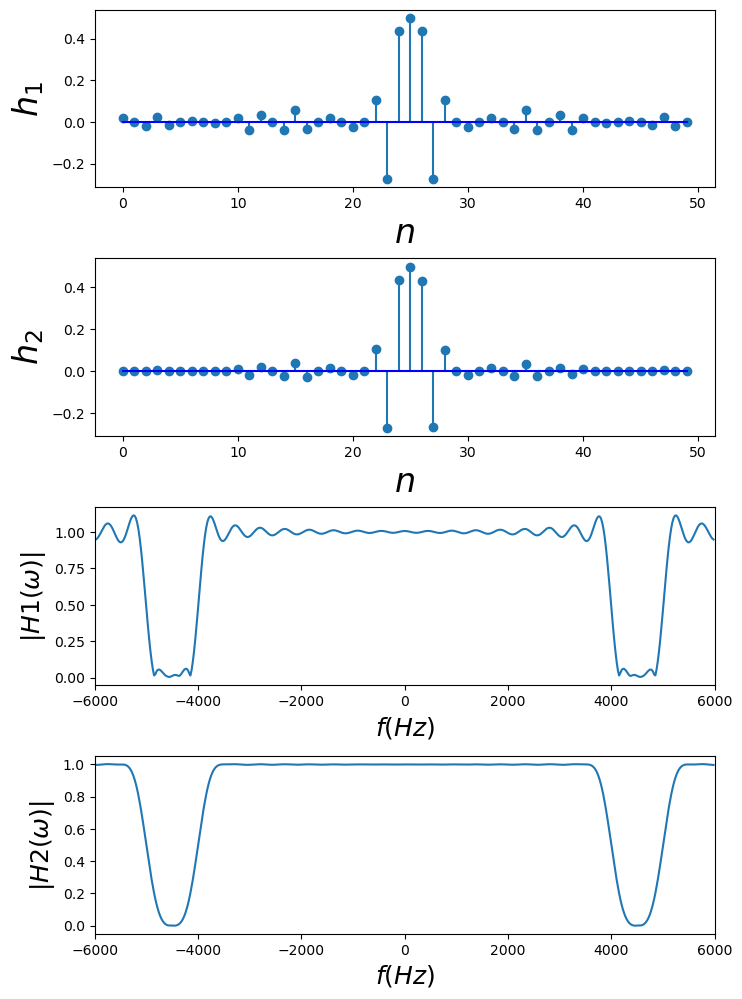

In [84]:
fig1,axs1 = subplots(4,1)
fig1.set_size_inches((8,12))
subplots_adjust(hspace=0.4)

#Respuesta al impulso del filtro asignado
ax=axs1[0]
ax.stem(n+M,h1,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_1$",fontsize=24)

#Respuesta al impulso del filtro asignado luego de aplicar la ventana Hamming
ax=axs1[1]
ax.stem(n+M,h2,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_2$",fontsize=24)


#Respuesta en frecuencia antes del enventanado
ax=axs1[2]
ax.plot((w1-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh1)))
ax.axis(xmax=fs/2,xmin=-fs/2)

ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H1(\omega)| $",fontsize=18)

#Respuesta en frecuencia despues del enventanado 
ax=axs1[3]
ax.plot((w2-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(Hh2)))
ax.axis(xmax=fs/2,xmin=-fs/2)

ax.set_xlabel(r"$f (Hz)$",fontsize=18)
ax.set_ylabel(r"$|H2(\omega)| $",fontsize=18)



## 2. Filtrado de audios con filtros FIR


#### 2.1 Escriba un programa que grafique una señal de audio de voz. Recuerde, normalizar la señal en amplitud, eliminar su nivel DC y crear su vector de tiempo dependiendo de su fs.

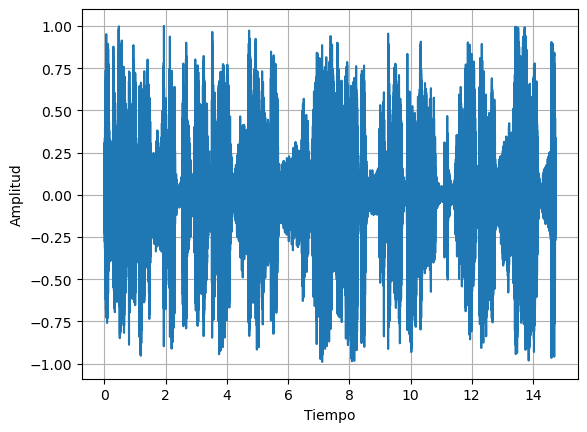

In [24]:
from scipy.io.wavfile import read 
from IPython.display import Audio

%matplotlib inline

fileaudio=('voz-lupe.wav')

fs, x=read(fileaudio) 
x=x/float(max(abs(x))) 

t=np.arange(0, float(len(x))/fs, 1.0/fs) 

plt.plot(t,x) 
plt.xlabel('Tiempo') 
plt.ylabel('Amplitud')
plt.grid('True')
plt.show()
Audio(x, rate=fs)

#### 2.2 muestre el espectro de la señal sin filtrar

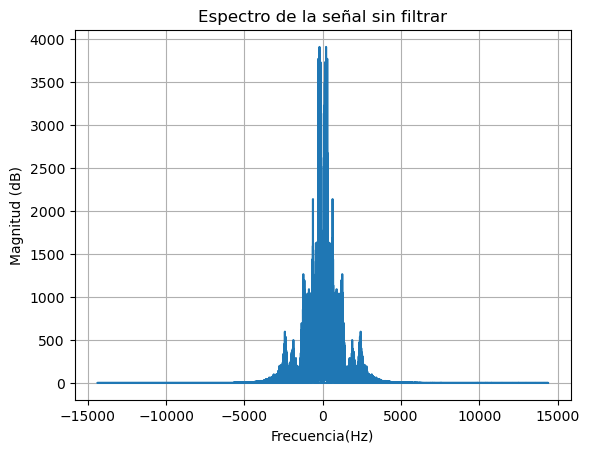

In [64]:
esp=np.fft.fft(x)
f2=np.fft.fftfreq(np.abs(esp).size)*fs
plt.plot(f2,np.abs(esp))
plt.title('Espectro de la señal sin filtrar')
plt.xlabel('Frecuencia(Hz)') 
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.show()

#### 2.3 Diseñe un filtro FIR pasa-bajas para  que el audio seleccionado se escuche más grave,para esto tenga en cuenta los valores de la banda de transición, la  frecuencia de corte  y el  ripple.
R/ Se denomina grave a las frecuencias más bajas de la voz humana, por esto para este filtro se usaran tendremos que toamr valores pequeños en la fecuencia para lograr que el audio se esuche grave 
tendremos una banda de transiion de 200 Hz
la frecuencia de corte sera de 500 Hz
Ripple de 60 dB


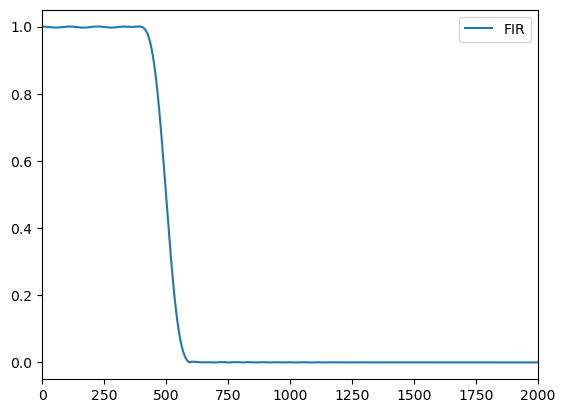

In [94]:
from scipy.signal import kaiserord, lfilter, firwin, freqz
nyq_rate = fs/2.0
roll_off = 200.0
cutoff_hz = 500.0
width = roll_off/nyq_rate
ripple_db = 60.0 #The desired attenuation in the stop band, in dB.
N, _ = kaiserord(ripple_db, width) # Compute the order and Kaiser parameter for the FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, pass_zero=True)
w, h = signal.freqz(taps, [1], worN=2000)

plt.plot(nyq_rate*w/np.pi, np.abs(h), label='FIR')
plt.legend()
plt.xlim(-1,2000)
#####
filtered_x = lfilter(taps, 1.0, x)

Audio(filtered_x, rate= fs)

#### 2.4 generara un efecto en la voz del audio para que suene mas gruesa ( efecto moustro) 

In [108]:
fileaudio=('voz-lupe.wav')
fs, x=read(fileaudio) 
x=x/float(max(abs(x))) 
fs=fs/2
Audio(x, rate=fs)

#### 2.5 generara un efecto en la voz del audio para que suene mas agudo ( efecto ardilla) 

In [98]:
fileaudio=('voz-lupe.wav')
fs, x=read(fileaudio) 
x=x/float(max(abs(x))) 
fs=1.5*fs
Audio(x, rate=fs)

R para estos 2 proceso se logran modificando la frecuencia de muestreo 

## 3. Filtro de paso de banda elíptico
Es un tipo de filtro que presenta una respuesta de frecuencia más compleja y permite un control más preciso sobre la banda de paso y la banda de rechazo.

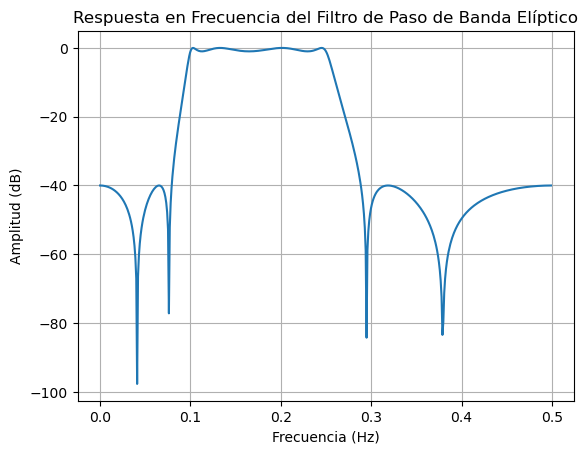

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Especificar las frecuencias de corte de las bandas de paso y rechazo
wp = [0.2, 0.5]  # Frecuencias de corte de la banda de paso (normalizadas)
ws = [0.1, 0.6]  # Frecuencias de corte de la banda de rechazo (normalizadas)

# Especificar las atenuaciones deseadas para las bandas de paso y rechazo (en dB)
gpass = 1  # Atenuación máxima permitida en la banda de paso (en dB)
gstop = 40  # Atenuación mínima requerida en la banda de rechazo (en dB)

# Calcular el orden y los coeficientes del filtro elíptico
N, Wn = signal.ellipord(wp, ws, gpass, gstop)
b, a = signal.ellip(N, gpass, gstop, Wn, btype='bandpass', analog=False, output='ba')

# Graficar la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a)
frequencies = w / (2 * np.pi)  # Frecuencias (en Hz)
amplitudes = 20 * np.log10(abs(h))  # Amplitudes (en dB)
plt.plot(frequencies, amplitudes)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.title('Respuesta en Frecuencia del Filtro de Paso de Banda Elíptico')
plt.grid(True)
plt.show()

## 4. Conclusiones 
* El método de enventanado es una aproximación al diseño de filtros FIR que se basa en multiplicar una secuencia finita de coeficientes por una ventana, que es una función que define la forma del filtro.
* Las ventanas más comunes utilizadas en el diseño de filtros FIR son la ventana rectangular, la ventana de Hamming, la ventana de Blackman, entre otras. Cada ventana tiene diferentes características y propiedades en términos de ancho del lóbulo principal, atenuación de los lóbulos secundarios y relación entre el ancho del lóbulo principal y la atenuación de los lóbulos secundarios.
* El método de enventanado permite especificar las características del filtro FIR, como la frecuencia de corte, la atenuación de los lóbulos secundarios y la respuesta en frecuencia deseada.
* Una forma de optimizar los filtros es aplicando ventanas como la hamming, estas ventanas atenúan el ripple de forma muy eficiente, pero amplian la banda de transición, ya que estos son inversamente proporcionales, ya dependería de la aplicación o la necesidad que se tenga a 
* El uso de filtros es muy común  en audio, ya que permiten filtrar bajos, altos o bandas en específico.
* los filtros FIR son una herramienta poderosa en el procesamiento de audio debido a su diseño preciso, estabilidad, linealidad, flexibilidad y eficiencia de implementación. Estas características hacen que los filtros FIR sean ampliamente utilizados en aplicaciones como la ecualización, el filtrado de ruido, la cancelación de eco y muchas otras técnicas de mejora y manipulación de audio.
* los filtros de paso de banda elíptica ofrecen un control preciso de las frecuencias de paso y rechazo, junto con una alta atenuación de las frecuencias no deseadas. Estas características los hacen una opción valiosa en aplicaciones donde se requiere una selectividad y supresión eficiente de las frecuencias no deseadas, como en sistemas de comunicación y procesamiento de señales.